In [1]:
#!apt-get install libgeos-3.5.0
#!apt-get install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip
#!pip install pyproj==1.9.6

In [2]:
# IF RUNNING LOCALLY, DON'T NEED TO RUN THIS
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation
import cv2
import os
from tqdm import tnrange
%matplotlib inline

In [4]:
PATH = '/PATH TO FOLDER/bird_tracking_small.csv'
DRIVEPATH = '/PATH TO FOLDER/Images/'
df = pd.read_csv(PATH)
df.head()

,longitude,latitude,date
0,3.174556,51.335466,2013-06-04
1,3.181141,51.342359,2013-06-04
2,3.180923,51.341480,2013-06-04
3,3.180829,51.341498,2013-06-04
4,3.173349,51.329456,2013-06-04


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666502 entries, 0 to 666501
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   longitude  666502 non-null  float64
 1   latitude   666502 non-null  float64
 2   date       666502 non-null  object 
dtypes: float64(2), object(1)
memory usage: 15.3+ MB


In [6]:
df.isna().any()

longitude    False
latitude     False
date         False
dtype: bool

In [7]:
dfs = dict(tuple(df.groupby('date')))
dates = np.unique(df.date.values)

In [9]:
topn = df.groupby('date').head(1)
topn = topn.reset_index().drop(columns=['index'], axis=1)

In [10]:
topn.head()

,longitude,latitude,date
0,3.174556,51.335466,2013-06-04
1,3.180748,51.341481,2013-06-05
2,3.180781,51.341510,2013-06-06
3,3.180808,51.341480,2013-06-07
4,3.180809,51.341535,2013-06-08


In [11]:
lat_max = max(df.latitude.values)
lat_min = min(df.latitude.values)+20
lon_max = max(df.longitude.values)
lon_min = min(df.longitude.values)

print(lat_min, lat_max, lon_min, lon_max)

32.354424 54.3338823 -17.6261451 7.4792583


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-17.6261451,32.354424,7.479258299999999,54.3338823&bboxSR=4326&imageSR=4326&size=1500,1313&dpi=96&format=png32&transparent=true&f=image


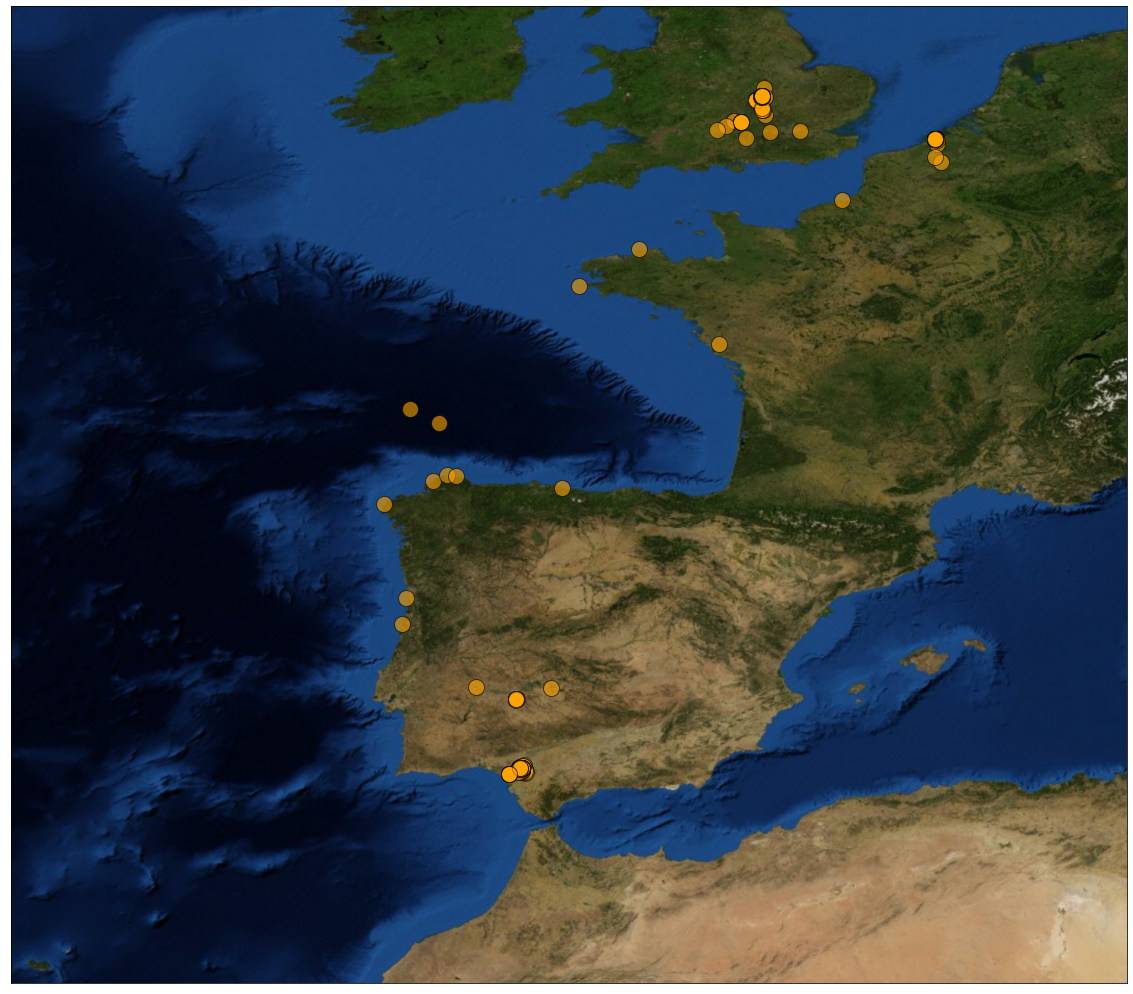

In [12]:
map = Basemap(llcrnrlon=lon_min,llcrnrlat=lat_min,urcrnrlon=lon_max,urcrnrlat=lat_max, epsg=4326)
plt.figure(figsize=(20,20))
map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
lats = topn.head(300).latitude.values
longs = topn.head(300).longitude.values
x, y = map(longs, lats)
map.plot(x, y, linestyle='none', marker="o", markersize=16, alpha=0.6, c="orange", markeredgecolor="black", markeredgewidth=1)
plt.show()

In [14]:
def save_figures(df, suffix, date=None):
    fig = plt.figure(figsize=(20,20))
    map = Basemap(llcrnrlon=lon_min,llcrnrlat=lat_min,urcrnrlon=lon_max,urcrnrlat=lat_max, epsg=4326)
    map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
    lats = df.latitude.values
    longs = df.longitude.values
    x, y = map(longs, lats)
    map.plot(x, y, linestyle='none', marker="o", markersize=30, alpha=0.6, c="orange", markeredgecolor="black", markeredgewidth=1)
    DRIVEPATH = 'PATH TO IMAGE FOLDER/Images/'
    save_as = os.path.join(DRIVEPATH,'img_'+str(suffix)+'.jpg')
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    fig.suptitle('Day: '+str(suffix)+'/ Date: '+str(date), fontsize=20)
    #plt.savefig("filename.jpg", bbox_inches = 'tight', pad_inches = 0)
    plt.savefig(save_as)
    #plt.close('all')
    plt.close(fig)
    #print('Saved successfully as: {}'.format(save_as))

def plot_and_save(dfs, dates):
    size = 303 #len(dates)
    skip = 2
    print('Date count:', size)
    for i in range(size):
        df = dfs[dates[i]]
        save_figures(df.head(1), i, str(dates[i]))
        if i%10==0 or i==size-1:
            print('ITR {}/{} EXEC DONE!'.format(i, size-1))


In [14]:
plot_and_save(dfs, dates)

In [17]:
def convert_frames_to_video(pathIn, pathOut, fps):
    frame_array = []
    files = os.listdir(pathIn)
    
    for i in tnrange(len(files), desc='reading files..'):
        filename=os.path.join(pathIn, files[i])
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        frame_array.append(img)
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    for i in range(len(frame_array)):
        out.write(frame_array[i])
    out.release()

PATHIN = 'PATH TO IMAGE FOLDER/Images/'
PATHOUT = 'FOLDER PATH TO SAVE THE VIDEO/BirdMigrationPath.mp4'
convert_frames_to_video(PATHIN, PATHOUT, 15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  """Entry point for launching an IPython kernel.
